## Job Market Analysis and Recommendation System

### Objective

##### The objective of this project is to analyze job market trends and build a recommendation system for job seekers based on real-time data. The system will identify high-demand job roles, salary trends, and emerging job categories, providing personalized job recommendations.

### Problem Statement

##### The rapidly changing job market presents challenges for job seekers in identifying high-demand roles and negotiating competitive salaries. Traditional job search methods often fail to offer timely and personalized recommendations aligned with current market trends. There is a need for a data-driven approach to analyze job postings and extract meaningful insights to guide job seekers in their career decisions.

### Situational Overview

##### The job market is influenced by various factors such as technological advancements, economic shifts, and cultural trends. By leveraging data analytics, this project aims to understand these dynamics and offer actionable insights. The system will analyze historical and current job postings data to provide predictions and recommendations that benefit job seekers and recruiters.

### Task 1: Analyze the correlation between job title keywords and offered salaries

#### Import Libraries

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

#### Import Dataset

In [116]:
job_market= pd.read_csv('all_upwork_jobs.csv')

#### Read the Dataset

In [117]:
job_market

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


#### Finding the Null Values in dataset

In [118]:
job_market.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

#### Drop unnessasary column

In [119]:
null_title = job_market[job_market['title'].isnull()]
null_title

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
38078,NaN,NaN,2024-02-20 16:28:05+00:00,True,NaN,NaN,NaN,NaN


In [120]:
job_market.drop(38078, inplace=True)

### Fill null values with median in the budget column

In [121]:
median_budget = job_market['budget'].median()
job_market['budget'].fillna(median_budget, inplace=True)

Fill null values with Not Applicable for Country Column

In [122]:
job_market['country'].fillna('Not Applicable', inplace=True)

In [123]:
job_market.isnull().sum()

title                  0
link                   0
published_date         0
is_hourly              0
hourly_low        142405
hourly_high       146052
budget                 0
country                0
dtype: int64

In [124]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [125]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
job_market['tokens']= job_market['title'].apply(word_tokenize)

In [127]:
stop_words = set(stopwords.words('english'))
job_market['tokens'] = job_market['title'].apply(lambda title: [word for word in title.split() if word.lower() not in stop_words])

In [128]:
print(job_market[['title', 'tokens']].head())

                                               title  \
0  Experienced Media Buyer For Solar Pannel and R...   
1                               Full Stack Developer   
2                                    SMMA Bubble App   
3             Talent Hunter Specialized in Marketing   
4                                      Data Engineer   

                                              tokens  
0  [Experienced, Media, Buyer, Solar, Pannel, Roo...  
1                           [Full, Stack, Developer]  
2                                [SMMA, Bubble, App]  
3           [Talent, Hunter, Specialized, Marketing]  
4                                   [Data, Engineer]  


In [129]:
lemmatizer = WordNetLemmatizer()
job_market['lemmatized_tokens']=job_market['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(job_market['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

# Target variable
y = job_market['budget']


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
print('\nTraining set shape:', X_train.shape, y_train.shape)
print('\nTesting set shape:', X_test.shape, y_test.shape)


Training set shape: (195861, 38692) (195861,)

Testing set shape: (48966, 38692) (48966,)


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Define the CountVectorizer
vectorizer = CountVectorizer()

# Transform the lemmatized tokens into a sparse matrix
X_count = vectorizer.fit_transform(job_market['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

# Convert the sparse matrix to a DataFrame with sparse data types
word_freq_df = pd.DataFrame.sparse.from_spmatrix(X_count, columns=vectorizer.get_feature_names_out())

In [134]:
keyword_freq = word_freq_df.sum().sort_values(ascending=False).head(30)

In [135]:
keyword_freq

needed         17591
website        17445
developer      16177
video          15300
expert         15104
design         13506
designer       13031
need           10468
amp             9690
specialist      9060
looking         8747
marketing       8416
app             8282
editor          8123
social          7660
youtube         7659
data            7161
manager         6920
create          6902
content         6865
wordpress       6787
google          6744
assistant       6704
project         6468
media           6454
web             6380
business        6310
development     5956
logo            5799
graphic         5611
dtype: Sparse[int64, 0]

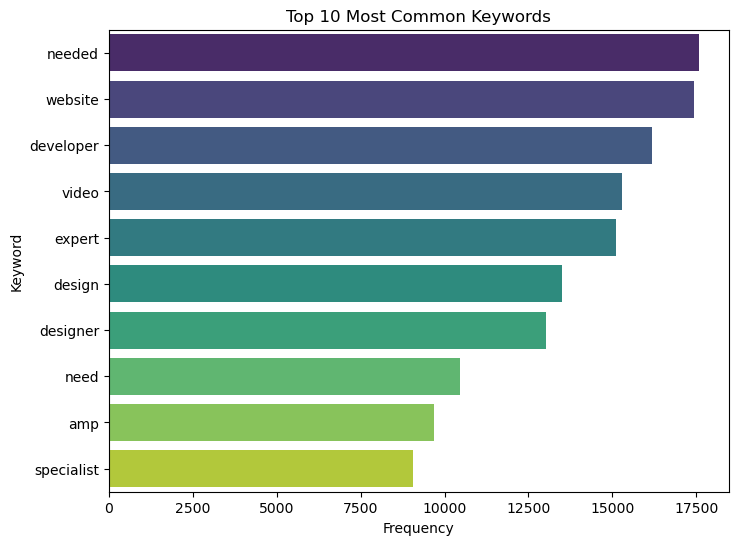

In [136]:
# Calculate the top 10 most common keywords
keyword_freq = word_freq_df.sum().sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=keyword_freq.values, y=keyword_freq.index, palette='viridis')
plt.title('Top 10 Most Common Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

In [141]:
job_market.head(2)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,tokens,lemmatized_tokens
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,Not Applicable,"[Experienced, Media, Buyer, Solar, Pannel, Roo...","[Experienced, Media, Buyer, Solar, Pannel, Roo..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,"[Full, Stack, Developer]","[Full, Stack, Developer]"


In [142]:
from collections import defaultdict

keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Calculate total salary and count for each keyword
for index, row in job_market.iterrows():
    budget = row['budget']
    for keyword in row['tokens']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculate average salary for each keyword
keyword_avg_salary = {k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()}

In [147]:
keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False).round(2)
keyword_salary_df.head(10)

,Keyword,Average_Salary
83055,opportunities?,1000000.0
83056,Martkeplace,1000000.0
71693,⚠️,1000000.0
83054,independence,1000000.0
88274,$1M/Month,1000000.0
48261,FBM),999999.0
72208,token-2022,999999.0
87608,Webseries,600000.0
85786,representant,400000.0
43844,counsellor,400000.0


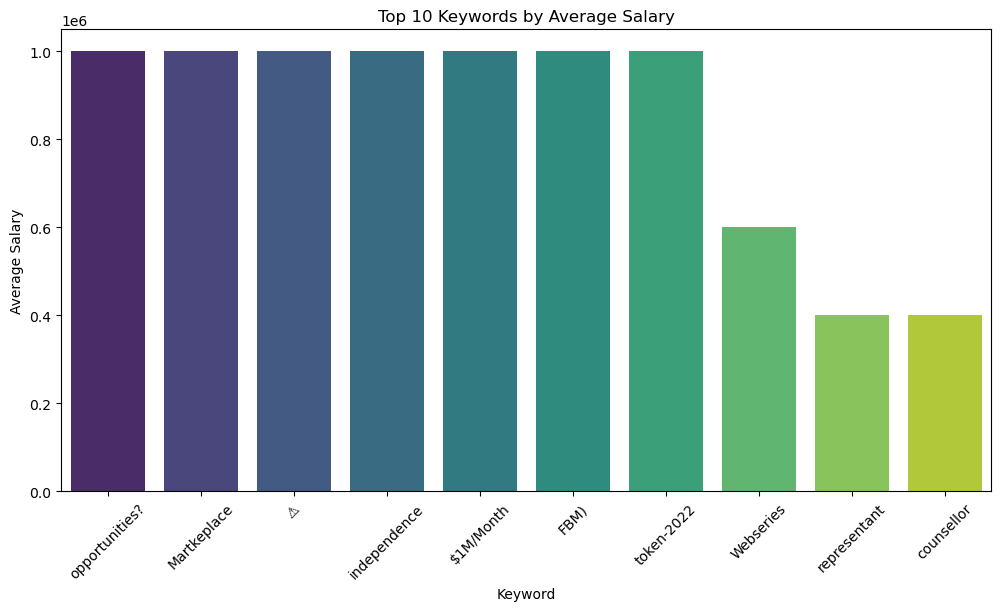

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_salary_df.head(10), x='Keyword', y='Average_Salary', palette='viridis')
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Keyword')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()